# One step further: Mastering Atari games with RL

<br>
In this notebook we introduce the most complex environments that we are going to solve. These are classic video games of the atari 2600 console, in which the states consist of the images that the console projects on the screen and the actions are represented by the buttons on the controller.

Working with states represented by pixels will force us to use a new class of function approximators called convolutional neural networks.

<br><br><br>
<div style="text-align:center">
    <b>This notebook belongs to lesson 9 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>


<br><br>

<table>
    <tr style="background-color: transparent">
            <td>
        <a target="_parent" href="https://colab.research.google.com/github/escape-velocity-labs/evrl/blob/main/notebooks/Atari_Introduction.ipynb" style="float: center">
            <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
        </a>  
    </td>
    </tr>
    <tr>
        <th style="text-align: center">Open this notebook in Google colab</th>
    </tr>
</table>

<br>

In [8]:
import gym
import torch
from IPython import display
import matplotlib.pyplot as plt
from evrl.common.envs import make_atari
%matplotlib inline

In [9]:
def test_env(env: gym.Env) -> None:
    env.reset()
    done = False
    img = plt.imshow(env.render(mode='rgb_array')) 
    while not done:
        action = torch.tensor(env.action_space.sample())
        _, _, done, _ = env.step(action)
        img.set_data(env.render(mode='rgb_array')) 
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)

## Breakout: bounce the ball to destroy the ceiling.

###### Create the environment

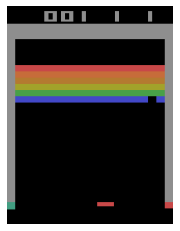

In [11]:
env = make_atari('BreakoutNoFrameskip-v4')
test_env(env)
env.close()

###### The state

<br><br><br>

In [ ]:
# Take several random actions to fetch a random state of the game.

state = env.reset()
for _ in range(10):
    random_action = torch.randint(env.action_space.n, (1, 1))
    state, _, _, _ = env.step(random_action)

In [ ]:
# Check the shape of an observation.
print(
    "Each observation has the following shape:", 
    "Batch x Frames x Height x Width",
    state.shape,
    sep="\n")

In [ ]:
# Separate the frames.
frame1, frame2, frame3, frame4 = state.squeeze()

In [ ]:
# Put the frames side by side.
merged_frames = torch.cat([frame1, frame2, frame3, frame4], dim=1)

In [ ]:
plt.figure(figsize=(16,16))
plt.title("Sample Observation")
plt.imshow(merged_frames, cmap='gray')

###### The actions available

<br><br><br>

In [13]:
meanings = env.unwrapped.get_action_meanings()
actions = dict(zip(range(len(meanings)), meanings))
print(f"These are the actions we can take and what they mean:\n\n{actions}")

These are the actions we can take and what they mean:

{0: 'NOOP', 1: 'FIRE', 2: 'RIGHT', 3: 'LEFT'}


## Space Invaders: shoot down alien spaceships while dodging their fire.

## Pong: beat the opponent at table tennis.

## Creating the environment

In [ ]:
env = make_atari('BreakoutNoFrameskip-v4', tag='')

## What our agent sees:

## References

[[1] OpenAI gym: Atari: Reach high scores in Atari 2600 games.](https://gym.openai.com/envs/#atari)